Reference

In [ ]:
## Reference from Week5 & Week 6 Tutorial Codes
## https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/ ## For Distribution of LoR predictions
## https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04 ## For Confusion Matrix Diagram


# Pre-modelling work

## Importing libraries

In [ ]:
# Import libraries and packages
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import os
import itertools
from nltk import word_tokenize
import string
import pandas as pd
import numpy as np
default_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Read data using pd.read_csv
news_data = pd.read_csv("Huff_news.csv", header = 0, index_col=0)
news_data.head()

,authors,category,date,headline,link,short_description
0,Rahel Gebreyes,MEDIA,31/01/2015,HuffPost's DC Chief Responds To Obama's Warnin...,https://www.huffingtonpost.com/entry/obama-cri...,NaN
1,Paul Brandeis Raushenbush,RELIGION,31/01/2015,Sexism: The Original Sin Of The Church,https://www.huffingtonpost.com/entry/sexism-ch...,NaN
2,Kimberly Yam,GOOD NEWS,31/01/2015,Banksy Exhibit Inspires Ex-Drug Addict To Chan...,https://www.huffingtonpost.com/entry/jps-banks...,NaN
3,"Brad Puet, ContributorStreet and documentary p...",ARTS,31/01/2015,Spirit of the Hawk,https://www.huffingtonpost.com/entry/spirit-of...,NaN
4,"Aimee Heckel, ContributorWriter",COMEDY,31/01/2015,The Surprising Use for Big Lots Reward Cards,https://www.huffingtonpost.com/entry/the-surpr...,"Dear Husband, I hope you enjoy your lunch. I m..."


In [ ]:
# Remove unnecessary columns
df_news = news_data[["headline", "short_description", "category"]]
df_news.head()

,headline,short_description,category
0,HuffPost's DC Chief Responds To Obama's Warnin...,NaN,MEDIA
1,Sexism: The Original Sin Of The Church,NaN,RELIGION
2,Banksy Exhibit Inspires Ex-Drug Addict To Chan...,NaN,GOOD NEWS
3,Spirit of the Hawk,NaN,ARTS
4,The Surprising Use for Big Lots Reward Cards,"Dear Husband, I hope you enjoy your lunch. I m...",COMEDY


In [ ]:
# Merge headline and short_description into a new column named "text all"
df_news["text_all"] = df_news["headline"] + " "+ df_news["short_description"].fillna("")

<ipython-input-7-92908178b597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news["text_all"] = df_news["headline"] + " "+ df_news["short_description"].fillna("")


In [ ]:
# Extract the relevant columns for building models
df = df_news[["text_all", "category"]]
df.head()

,text_all,category
0,HuffPost's DC Chief Responds To Obama's Warnin...,MEDIA
1,Sexism: The Original Sin Of The Church,RELIGION
2,Banksy Exhibit Inspires Ex-Drug Addict To Chan...,GOOD NEWS
3,Spirit of the Hawk,ARTS
4,The Surprising Use for Big Lots Reward Cards D...,COMEDY


## EDA - Before cleaning

Text(0.5, 1.0, 'Count of catergory (Whole Dataset)')

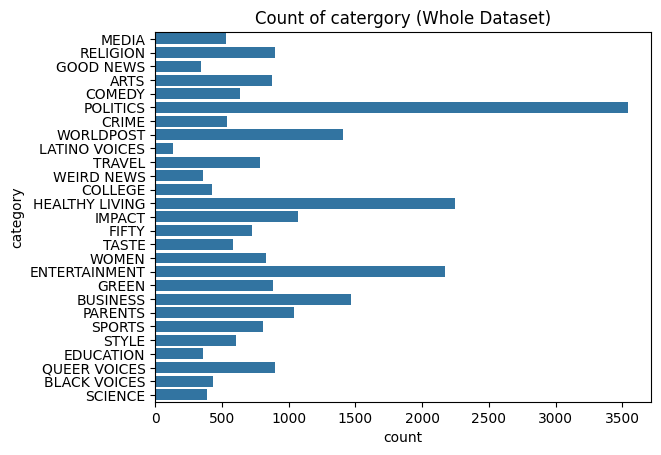

In [ ]:
# Counting the number of observations for each category in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['category'])
plt.title('Count of catergory (Whole Dataset)')

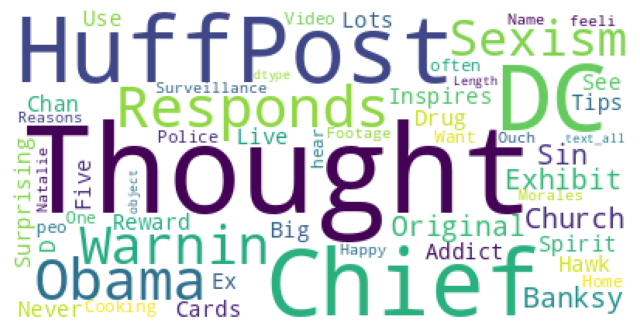

In [ ]:
# Create a wordcloud

from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=80,max_words=100, background_color="white").generate(str(df['text_all']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The most frequently appear words are:

1.   Thought
2.   Chief
3.   Huffpost
4.   Responds

## Cleaning text data

In [ ]:
# Define a cleaning function, for stopwords removal, lemmatization or stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lemma = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

def clean_text(doc,
            rm_punctuation=True,
            rm_digits=True,
            lemmatize=False,
            norm_case=True,
            stem=False,
            rm_stopwords=True):

            # Doc overall operations
            if(rm_digits==True):
                table = str.maketrans({key: None for key in string.digits})
                doc = str(doc).translate(table)
            if(norm_case==True):
                doc = doc.lower()
            if(rm_punctuation==True):
                table = str.maketrans({key: None for key in string.punctuation})
                doc = doc.translate(table)
            if(rm_stopwords==True):
                words = " ".join([i for i in doc.split() if i not in default_stopwords])
            else:
                words = " ".join([i for i in doc.split()])
            if(lemmatize==True):
                words = " ".join(lemma.lemmatize(word) for word in words.split())
            if(stem==True):
                words = " ".join(porter_stemmer.stem(word) for word in words.split())
            return words

## EDA - Top 10 n-grams

In [ ]:
# Clean text using clean_text function
documents = [clean_text(x,stem=False,lemmatize=False) for x in df["text_all"]]

In [ ]:
# Import the library
import nltk
from nltk import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize word, spliting strings on white space
tokenized_docs = [nltk.word_tokenize(doc) for doc in documents]
# Flatten the list of tokenized words to get all words
all_words = [word for sublist in tokenized_docs for word in sublist]

# Create a frequency distribution of all words
freq_dist = FreqDist(all_words)

# Get the top 10 most common unigrams
top_10_unigrams = freq_dist.most_common(10)

words = [word for word, _ in top_10_unigrams]
frequencies = [count for _, count in top_10_unigrams]

# Create a dictionary to convert into a DataFrame
data_uni = {'Unigrams': words, 'Frequency': frequencies}
df_plot_uni = pd.DataFrame(data_uni)

<ipython-input-55-d9cf9fd3ddda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y='Unigrams', data=df_plot_uni, palette = color)


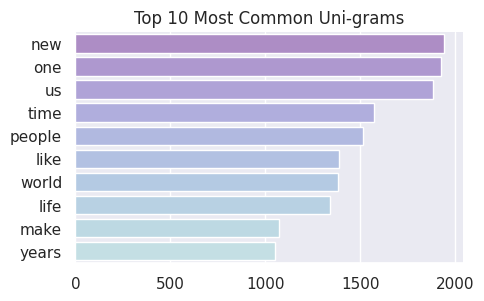

In [ ]:
# Plotting graph
import seaborn as sns

plt.figure(figsize=(5,3))
color = sns.cubehelix_palette(10, start=5, rot=-0.98, hue = 1, dark = 0.6, reverse = True)
ax = sns.barplot(x='Frequency', y='Unigrams', data=df_plot_uni, palette = color)
sns.despine()
ax.set_title('Top 10 Most Common Uni-grams')
ax.set(xlabel=None, ylabel=None)
sns.set(font_scale = 1)
plt.show()

In [ ]:
from nltk.util import ngrams

# Generate bigrams for each tokenized document
bigrams = [list(ngrams(doc, 2)) for doc in tokenized_docs]

# Flatten the list of bigrams to get all bigrams
all_bigrams = [bigram for sublist in bigrams for bigram in sublist]

# Create a frequency distribution of all words
bigram_freq_dist = FreqDist(all_bigrams)

# Get the top 10 most common bigrams
top_10_bigrams = bigram_freq_dist.most_common(10)

# Combine the words in each bigram into a single string
bigram_words = [' '.join(bigram) for bigram, _ in top_10_bigrams]
frequencies = [count for _, count in top_10_bigrams]

# Create a dictionary for the DataFrame
data_bi = {'Bigrams': bigram_words, 'Frequency': frequencies}
df_plot_bigram = pd.DataFrame(data_bi)

<ipython-input-17-5cfc89e717a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y='Bigrams', data=df_plot_bigram, palette = color)


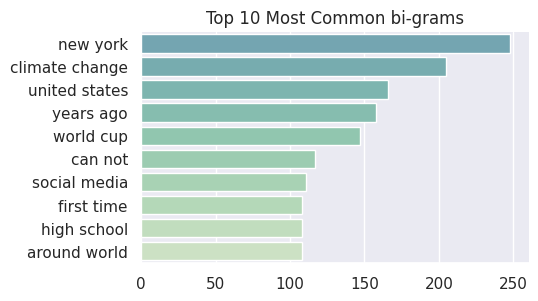

In [ ]:
# Plotting graph
plt.figure(figsize = (5,3))
color = sns.cubehelix_palette(10, start=1.3, rot=-0.98, hue = 1, dark = 0.6, reverse = True)
ax = sns.barplot(x='Frequency', y='Bigrams', data=df_plot_bigram, palette = color)
sns.despine()
ax.set_title('Top 10 Most Common bi-grams')
ax.set(xlabel=None, ylabel=None)
sns.set(font_scale = 1)
plt.show()

In [ ]:
# Create trigrams from the tokenized documents
trigrams = [list(ngrams(doc, 3)) for doc in tokenized_docs]

# Flatten the list of lists into a single list of trigrams
all_trigrams = [trigram for sublist in trigrams for trigram in sublist]

# Calculate frequency distribution for trigrams
trigram_freq_dist = FreqDist(all_trigrams)

# Get the top 10 trigrams
top_10_trigrams = trigram_freq_dist.most_common(10)

# Unpack the trigrams and frequencies
trigram_words = [' '.join(trigram) for trigram, _ in top_10_trigrams]
frequencies = [count for _, count in top_10_trigrams]

# Create a DataFrame for plotting
data_tri = {'Trigrams': trigram_words, 'Frequency': frequencies}
df_plot_trigram = pd.DataFrame(data_tri)

<ipython-input-57-565d8a079de6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y='Trigrams', data=df_plot_trigram, palette = color)


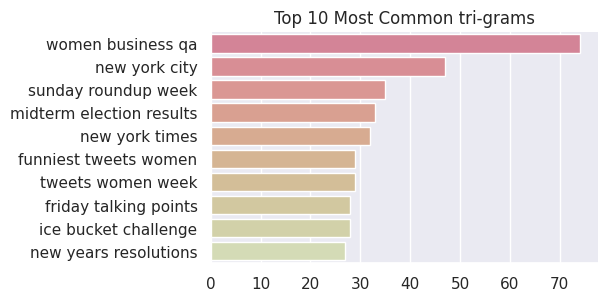

In [ ]:
plt.figure(figsize = (5,3))
color = sns.cubehelix_palette(10, start= 2, rot= 1 , hue = 1.3, dark = 0.6, reverse = True)
ax = sns.barplot(x='Frequency', y='Trigrams', data=df_plot_trigram, palette = color)
sns.despine()
ax.set_title('Top 10 Most Common tri-grams')
ax.set(xlabel=None, ylabel=None)
sns.set(font_scale = 1)
plt.show()

## Stemming or Lemmatization

 Here we decided to use stemming for better results

In [ ]:
# Clean text using clean_text function
# Stemming
cleaned_text = [clean_text(x,stem=True,lemmatize=False) for x in df["text_all"]]

# Create new column to store the cleaned text
df["cleaned"] = cleaned_text

<ipython-input-10-0d4abc9eaf2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned"] = cleaned_text


In [ ]:
# Remove "text_all" column
df_clean = df.drop(columns = ["text_all"])
df_clean.head()

,category,cleaned
0,MEDIA,huffpost dc chief respond obama warn read site
1,RELIGION,sexism origin sin church
2,GOOD NEWS,banksi exhibit inspir exdrug addict chang life...
3,ARTS,spirit hawk
4,COMEDY,surpris use big lot reward card dear husband h...


In [ ]:
# Check the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  25000 non-null  object
 1   cleaned   25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


## Creating tf-idf matrix

In [ ]:
# Decide maximum features numbers and N-gram
max_features_num = 3000
ngram_range = (1,1)

## Reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
# Set x and y variables
X = df_clean["cleaned"]
y = df_clean["category"]

# Create dtm matrix using term_frequency
from sklearn.feature_extraction.text import CountVectorizer

# max_features, min_df, max_df, ngram_range
vectorizer = CountVectorizer(max_features=max_features_num, min_df=5, max_df=0.7,
                             stop_words=stopwords.words('english'),
                             ngram_range = ngram_range)

X = vectorizer.fit_transform(X).toarray()

# Create dtm matrix using tf-idf score
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
df_X = pd.DataFrame(X)
df_X.loc[:,[441,442,658]].head()

,441,442,658
0,0.373959,0.0,0.381976
1,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000


## Train-text split


*   25% of data: testing based on evaluation strategy
*   75% of data: training the classifier



In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model building

## Logistic Regression (LoR)

In [ ]:
# Import the liabrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Building the LoR model
LoR=LogisticRegression()

LoR.fit(X_train,y_train)                # Fit the data for train and test set
LoR_prediction = LoR.predict(X_test)    # Predict the values for test data


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear Discriminant Analysis (LDA)

In [ ]:
# Import the library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Building the LDA model
LDA=LinearDiscriminantAnalysis()

LDA.fit(X_train,y_train)                # Fit the data for train and test set
LDA_prediction = LDA.predict(X_test)    # Predict the values for test data

## Support Vector Classifier (SVC)

In [ ]:
# Import the library
from sklearn.svm import SVC

In [ ]:
# Building the SVC model
SVC_model = SVC(probability=True)

SVC_model.fit(X_train, y_train)            # Fit the data for train and test set
SVC_prediction = SVC_model.predict(X_test) # Predict the values for test data

# Model Evaluation

## LoR

### Accuracy Score

In [ ]:
# Show accuracy
acc_LoR = accuracy_score(LoR_prediction, y_test)
print(accuracy_score(LoR_prediction, y_test))

0.49696


### Countplot

[Text(0.5, 1.0, 'LoR Predictions')]

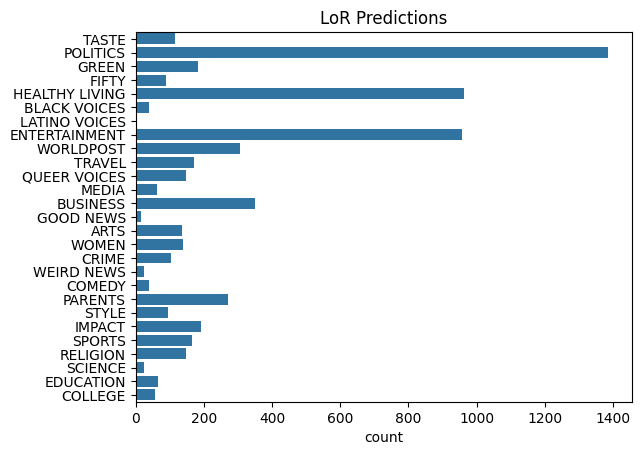

In [ ]:
# Distribution of LoR predictions
# Reference: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

sns.countplot(LoR_prediction).set(title='LoR Predictions')

According to the LoR predictions Countplot, the top 3 categories are:

1.   POLITICS
2.   HEALTHY LIVING
3.   ENTERTAINMENT

### Top 3 Predictions

In [ ]:
# Import the library
from functools import partial
from tabulate import tabulate

tabulate = partial(tabulate, headers='firstrow', tablefmt='pipe')

# Predicting Probabilities
LoR_proba = LoR.predict_proba(X_test)
zip_LoR_proba = list(zip(LoR.classes_, LoR_proba[0]))

# Sort the data by probability in descending order
sorted_LoR_proba = sorted(zip_LoR_proba, key=lambda x: x[1], reverse=True)

table = [["Class", "Probability"]] + sorted_LoR_proba
print(tabulate(table))

| Class          |   Probability |
|:---------------|--------------:|
| TASTE          |    0.400278   |
| HEALTHY LIVING |    0.0873624  |
| COMEDY         |    0.0623368  |
| ENTERTAINMENT  |    0.0504804  |
| TRAVEL         |    0.0386429  |
| STYLE          |    0.0357849  |
| WOMEN          |    0.0327922  |
| BUSINESS       |    0.0304232  |
| POLITICS       |    0.0247132  |
| GREEN          |    0.0223438  |
| SPORTS         |    0.0202289  |
| ARTS           |    0.0201756  |
| FIFTY          |    0.0175961  |
| WEIRD NEWS     |    0.0170685  |
| MEDIA          |    0.0161094  |
| PARENTS        |    0.0139992  |
| RELIGION       |    0.013792   |
| CRIME          |    0.0132156  |
| WORLDPOST      |    0.0132107  |
| IMPACT         |    0.0129654  |
| QUEER VOICES   |    0.0110521  |
| SCIENCE        |    0.0104269  |
| GOOD NEWS      |    0.010358   |
| COLLEGE        |    0.00824958 |
| BLACK VOICES   |    0.0077093  |
| EDUCATION      |    0.00484656 |
| LATINO VOICES  |  

The top 3 probabilities of the 1st prediction are:

1.   TASTE           (0.400278)
2.   HEALTHY LIVING  (0.0873624)
3.   COMEDY          (0.0623368)



### Confusion Matrix

In [ ]:
# Confusion Matrix
print (confusion_matrix(y_test, LoR_prediction))

[[ 80   2   6   0   0   0   1  47   0   0   3  12   0   0   0   1  19   3
    0   1   4   3   0   5   1   3   3]
 [  1  19   2   2   0   4   2  24   1   0   0   9   2   0   0   5  33   0
    1   0   1   3   0   2   1   0   4]
 [  1   2 181   1   0   0   1  18   3   1   4  54   0   0   3   4  65   0
    0   1   4   1   5   7   0   5   7]
 [  0   0   7  35   0   3   6   9   4   0   0  10   2   0   1   3  18   2
    0   0   0   0   0   2   0   2   2]
 [  2   0   5   1  18   0   0  54   1   2   3  18   4   0   2   7  26   2
    1   0   2   2   1   3   0   2   1]
 [  0   0   2   1   0  64   1   9   0   0   2   7   2   0   0   5  43   0
    1   0   0   0   1   2   6   1   9]
 [  1   0  10   6   0   0  32   1   0   0   0   8   9   0   0   3   9   0
    0   0   1   0   0   0   0   2   0]
 [  9   2  10   1   7   3   0 371   3   0   3  26   3   0   4   6  30   6
    3   1   3   8   6   1   2   7   2]
 [  1   0   9   0   0   0   0  19  34   0   1  45   5   0   0  14  17   2
    1   0   0   2   3 

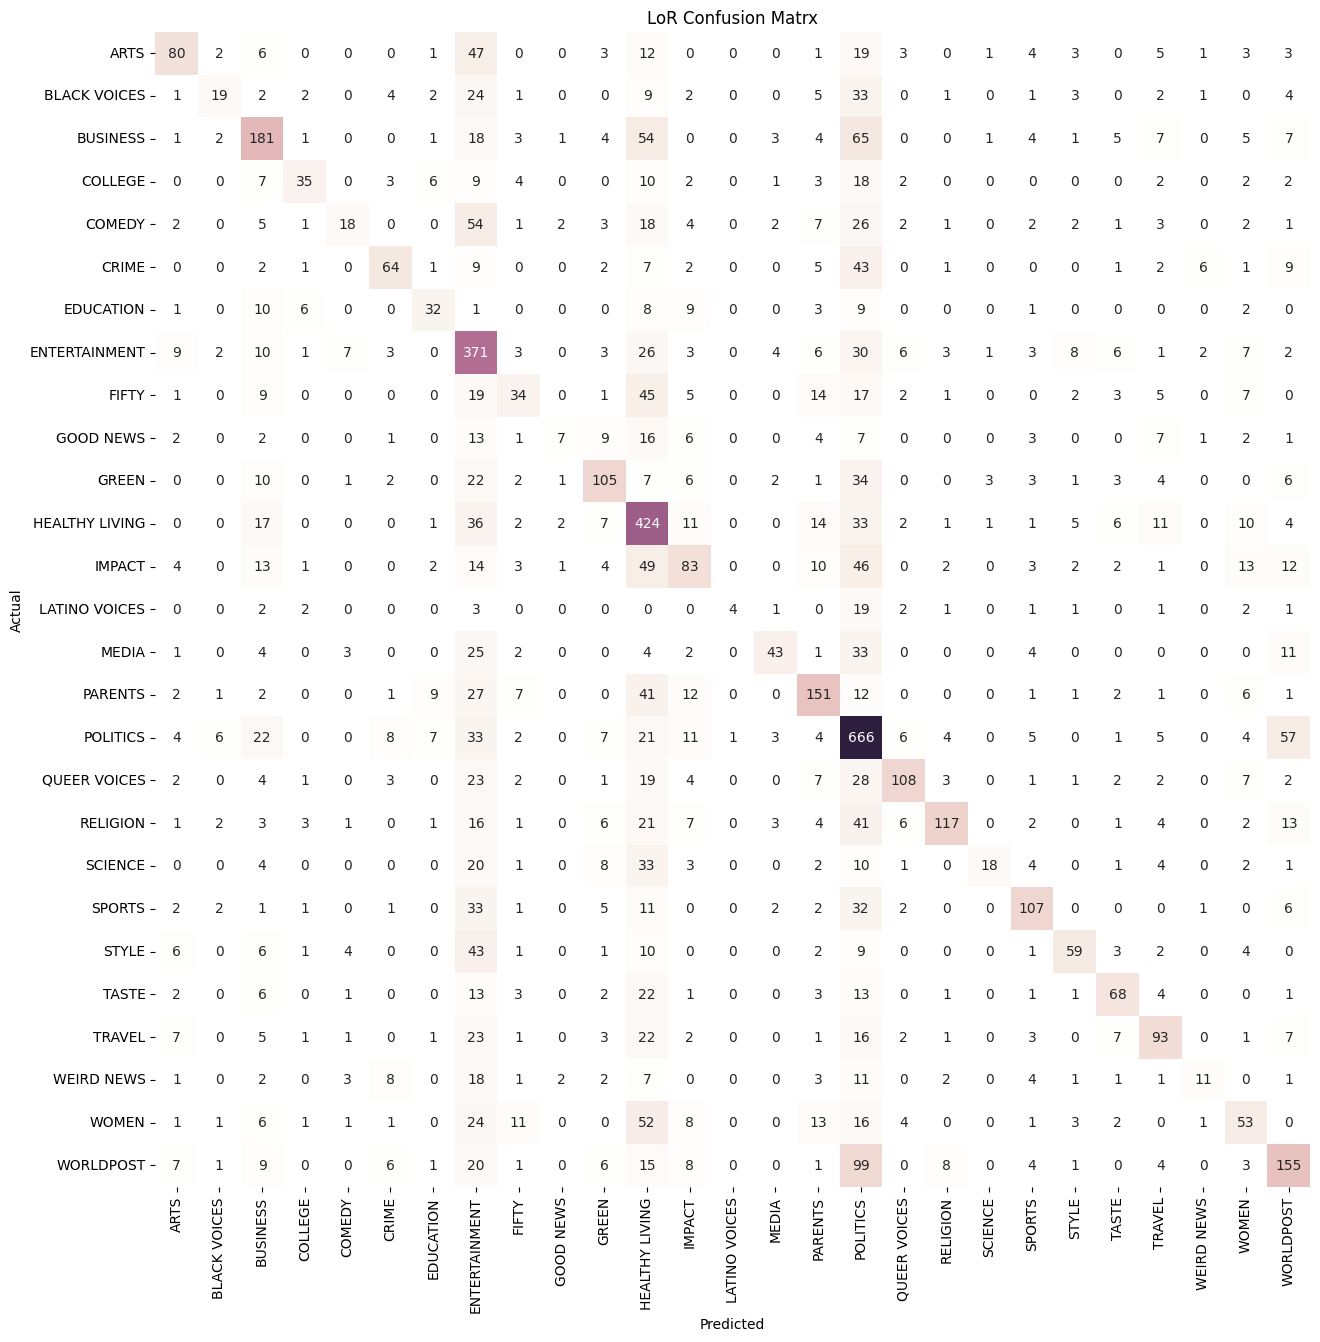

In [ ]:
## Confusion Matrix Diagram
## Reference: https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04

# Plot the confusion Matrix for better view of the results
CM = confusion_matrix(y_test, LoR_prediction)
CM = pd.DataFrame(CM, columns=np.unique(y_test), index = np.unique(y_test))
CM.index.name = 'Actual'
CM.columns.name = 'Predicted'

# Plotting with custom figure size
fig, ax = plt.subplots(figsize=(15, 15))  # Create figure and axes for the plot
ax.set_title('LoR Confusion Matrx')           # Set the title for the axes

# Generate a Cubehelix colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(CM, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})

# Display the plot
plt.show()

### LR Report

In [ ]:
# Classification report
print (classification_report(y_test, LoR.predict(X_test)))

                precision    recall  f1-score   support

          ARTS       0.58      0.41      0.48       194
  BLACK VOICES       0.50      0.16      0.25       116
      BUSINESS       0.52      0.49      0.50       368
       COLLEGE       0.60      0.33      0.43       106
        COMEDY       0.45      0.11      0.18       157
         CRIME       0.61      0.41      0.49       156
     EDUCATION       0.49      0.39      0.44        82
 ENTERTAINMENT       0.39      0.72      0.50       517
         FIFTY       0.39      0.21      0.27       165
     GOOD NEWS       0.44      0.09      0.14        82
         GREEN       0.58      0.49      0.53       213
HEALTHY LIVING       0.44      0.72      0.55       588
        IMPACT       0.43      0.31      0.36       265
 LATINO VOICES       0.80      0.10      0.18        40
         MEDIA       0.67      0.32      0.44       133
       PARENTS       0.56      0.55      0.55       277
      POLITICS       0.48      0.76      0.59  

## LDA

### Accuracy Score

In [ ]:
#Show accuracy
acc_LDA = accuracy_score(y_test, LDA_prediction)
print(accuracy_score(y_test, LDA_prediction))

0.484


### Countplot

[Text(0.5, 1.0, 'LDA Predictions')]

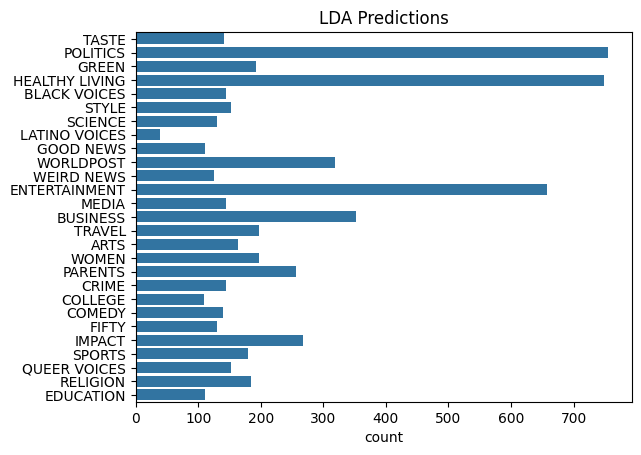

In [ ]:
# Distribution of LDA predictions
# Reference: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

sns.countplot(LDA_prediction).set(title='LDA Predictions')

According to the LDA predictions Countplot, the top 3 categories are:

1.   POLITIC
2.   HEALTHY LIVING
3.   ENTERTAINMENT

### Top 3 Predictions

In [ ]:
# Import the library
from functools import partial
from tabulate import tabulate

tabulate = partial(tabulate, headers='firstrow', tablefmt='pipe')

# Predicting Probabilities
LDA_proba = LDA.predict_proba(X_test)
zip_LDA_proba = list(zip(LDA.classes_, LDA_proba[0]))

# Sort the data by probability in descending order
sorted_LDA_proba = sorted(zip_LDA_proba, key=lambda x: x[1], reverse=True)

table = [["Class", "Probability"]] + sorted_LDA_proba
print(tabulate(table))

| Class          |   Probability |
|:---------------|--------------:|
| TASTE          |   1           |
| COMEDY         |   7.33055e-08 |
| WOMEN          |   3.81244e-10 |
| HEALTHY LIVING |   2.30659e-10 |
| ENTERTAINMENT  |   4.72871e-11 |
| TRAVEL         |   7.90178e-12 |
| BUSINESS       |   3.6327e-12  |
| POLITICS       |   1.24391e-12 |
| IMPACT         |   1.18607e-12 |
| FIFTY          |   1.7564e-13  |
| ARTS           |   7.71765e-14 |
| PARENTS        |   4.82663e-14 |
| WORLDPOST      |   2.68413e-14 |
| SPORTS         |   2.6376e-14  |
| MEDIA          |   6.06281e-15 |
| STYLE          |   5.94557e-15 |
| WEIRD NEWS     |   3.35812e-15 |
| GOOD NEWS      |   1.47575e-15 |
| RELIGION       |   5.56022e-16 |
| GREEN          |   3.41445e-16 |
| BLACK VOICES   |   4.45075e-17 |
| QUEER VOICES   |   5.65732e-18 |
| SCIENCE        |   2.52066e-18 |
| COLLEGE        |   3.16148e-19 |
| CRIME          |   1.24668e-19 |
| EDUCATION      |   1.49349e-21 |
| LATINO VOICES  |  

The top 3 probabilities of the 1st prediction are:
1. TASTE (1)
2. COMEDY (7.33055e-08)
3. WOMEN (3.81244e-10)



### Confusion Matrix

In [ ]:
# Confusion Matrix
print (confusion_matrix(y_test, LDA_prediction))

[[ 88   4   8   1   1   0   1  37   1   0   3   8   3   0   0   0   5   2
    1   4   2   3   0   6   5   7   4]
 [  3  43   6   3   1   3   4  16   2   0   0   4   2   2   1   2  10   0
    1   2   2   3   0   2   2   1   1]
 [  1   4 167   4   8   1   3  13   5   5   7  34   9   0  10   3  35   1
    2   6   6   6   8   8   5  10   7]
 [  1   1   5  52   0   4   5   4   6   2   0   6   2   0   3   2   2   1
    0   1   0   1   0   2   0   4   2]
 [  2   4   2   2  35   0   1  34   1   5   1  15   4   0   3   7   8   0
    2   6   3   2   3   5   3   7   2]
 [  0   6   5   2   2  70   1   3   1   0   2   5   1   0   0   4  17   1
    3   1   1   0   2   2  20   0   7]
 [  2   1   7   8   0   0  45   0   0   0   0   4   7   0   1   1   2   0
    1   1   1   0   0   0   0   1   0]
 [ 11  12   9   2  25   9   0 278   6   5   2  33   6   1  14  11  15   1
    3   9   3  21   7   3  10  14   7]
 [  3   1   9   0   1   0   1  15  49   1   2  30   7   0   2  11   2   1
    0   2   0   3   6 

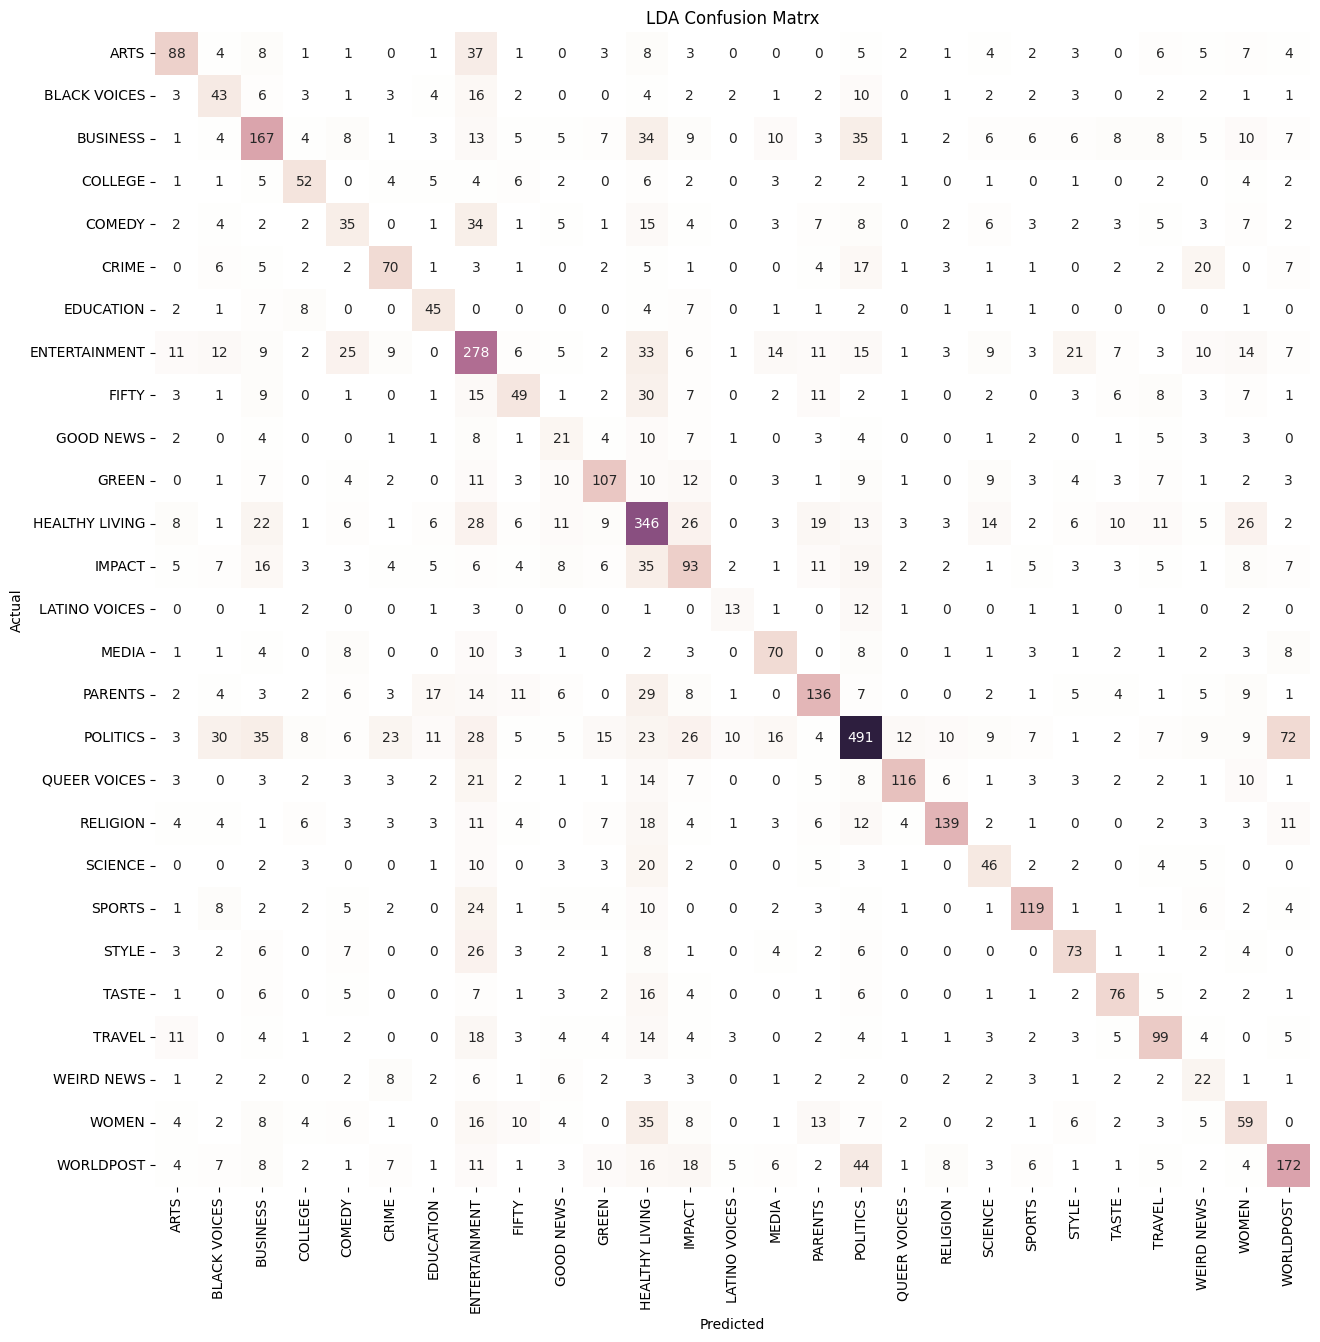

In [ ]:
## Confusion Matrix Diagram
## Reference: https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04

# Plot the confusion Matrix for better view of the results
CM_LDA = confusion_matrix(y_test, LDA_prediction)
CM_LDA = pd.DataFrame(CM_LDA, columns=np.unique(y_test), index = np.unique(y_test))
CM_LDA.index.name = 'Actual'
CM_LDA.columns.name = 'Predicted'

# Plotting with custom figure size
fig, ax = plt.subplots(figsize=(15, 15))  # Create figure and axes for the plot
ax.set_title('LDA Confusion Matrx')           # Set the title for the axes

# Generate a Cubehelix colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(CM_LDA, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})

# Display the plot
plt.show()

### LDA Report

In [ ]:
# Classification report
print (classification_report(y_test, LDA.predict(X_test)))

                precision    recall  f1-score   support

          ARTS       0.54      0.45      0.49       194
  BLACK VOICES       0.30      0.37      0.33       116
      BUSINESS       0.47      0.45      0.46       368
       COLLEGE       0.47      0.49      0.48       106
        COMEDY       0.25      0.22      0.24       157
         CRIME       0.48      0.45      0.47       156
     EDUCATION       0.41      0.55      0.47        82
 ENTERTAINMENT       0.42      0.54      0.47       517
         FIFTY       0.38      0.30      0.33       165
     GOOD NEWS       0.19      0.26      0.22        82
         GREEN       0.56      0.50      0.53       213
HEALTHY LIVING       0.46      0.59      0.52       588
        IMPACT       0.35      0.35      0.35       265
 LATINO VOICES       0.33      0.33      0.33        40
         MEDIA       0.48      0.53      0.50       133
       PARENTS       0.53      0.49      0.51       277
      POLITICS       0.65      0.56      0.60  

## SVC

### Accuracy Score

In [ ]:
#Show accuracy
acc_SVC = accuracy_score(y_test, SVC_prediction)
print(accuracy_score(y_test, SVC_prediction))

0.49104


### Countplot

[Text(0.5, 1.0, 'SVC Predictions')]

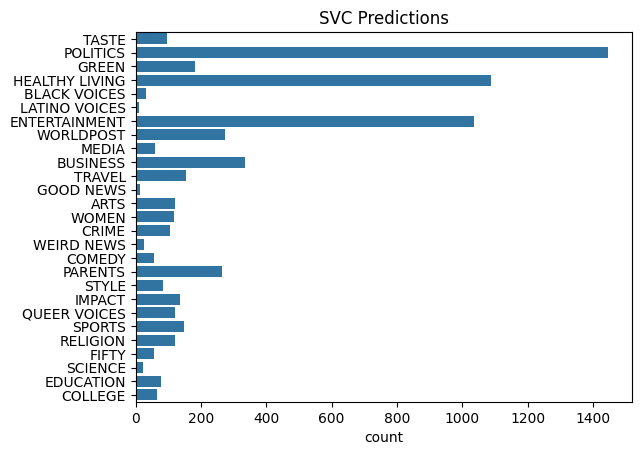

In [ ]:
# Distribution of SVC predictions
# Reference: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

sns.countplot(SVC_prediction).set(title='SVC Predictions')

According to the SVC predictions Countplot, the top 3 categories are:

1.   POLITICS
2.   HEALTHY LIVING
3.   ENTERTAINMENT


### Top 3 Predictions

In [ ]:
from functools import partial
from tabulate import tabulate

tabulate = partial(tabulate, headers='firstrow', tablefmt='pipe')

# Predicting Probabilities
SVC_proba = SVC_model.predict_proba(X_test)
zip_SVC_proba = list(zip(SVC_model.classes_, SVC_proba[0]))

# Sort the data by probability in descending order
sorted_SVC_proba = sorted(zip_SVC_proba, key=lambda x: x[1], reverse=True)

table = [["Class", "Probability"]] + sorted_SVC_proba
print(tabulate(table))nt(tabulate(table))

| Class          |   Probability |
|:---------------|--------------:|
| TASTE          |   0.88167     |
| COMEDY         |   0.0287919   |
| HEALTHY LIVING |   0.0182235   |
| STYLE          |   0.0118199   |
| ENTERTAINMENT  |   0.0102524   |
| TRAVEL         |   0.00886508  |
| WOMEN          |   0.0059932   |
| WEIRD NEWS     |   0.00494993  |
| BUSINESS       |   0.00415767  |
| GREEN          |   0.00354085  |
| FIFTY          |   0.00258922  |
| ARTS           |   0.00251097  |
| POLITICS       |   0.00226298  |
| MEDIA          |   0.00194838  |
| SPORTS         |   0.00191376  |
| GOOD NEWS      |   0.00173048  |
| PARENTS        |   0.00129878  |
| SCIENCE        |   0.00125965  |
| IMPACT         |   0.00116299  |
| CRIME          |   0.000880429 |
| RELIGION       |   0.000822329 |
| COLLEGE        |   0.000785468 |
| QUEER VOICES   |   0.00076628  |
| WORLDPOST      |   0.000713379 |
| BLACK VOICES   |   0.000630195 |
| LATINO VOICES  |   0.00024687  |
| EDUCATION      |  

The top 3 probabilities of the 1st prediction are
1. TASTE (0.88167)
2. COMEDY (0.0287919)
3. HEALTHY LIVING (0.0182235)

### Confusion Matrix

In [ ]:
# Confusion Matrix
print (confusion_matrix(y_test, SVC_prediction))

[[ 75   2   5   0   1   0   1  63   0   0   2  15   0   0   0   1  16   1
    0   1   1   1   0   3   1   2   3]
 [  0  17   2   2   0   3   3  26   0   0   0   9   2   0   0   2  41   0
    0   0   2   3   0   0   2   0   2]
 [  1   0 175   2   2   0   1  17   1   0   5  60   0   0   2   4  71   0
    0   1   4   0   5   6   0   5   6]
 [  0   0   7  34   0   3   4  11   2   0   0   9   3   0   0   2  26   1
    0   0   0   0   0   2   0   1   1]
 [  1   1   6   1  20   0   0  55   0   0   4  24   1   0   1   8  26   0
    0   0   1   1   0   3   0   2   2]
 [  0   0   3   2   0  65   2  12   0   0   2   3   1   0   0   5  46   0
    1   0   0   0   1   1   5   1   6]
 [  0   0   8   6   0   0  38   2   0   0   0  10   5   0   0   3   7   0
    1   0   1   0   0   0   0   1   0]
 [  6   2   7   1   4   2   0 380   3   0   3  32   3   0   4   8  31   3
    2   1   3   6   5   1   2   6   2]
 [  1   0  11   0   3   1   0  17  29   0   1  55   3   0   0  13  17   0
    1   0   0   2   2 

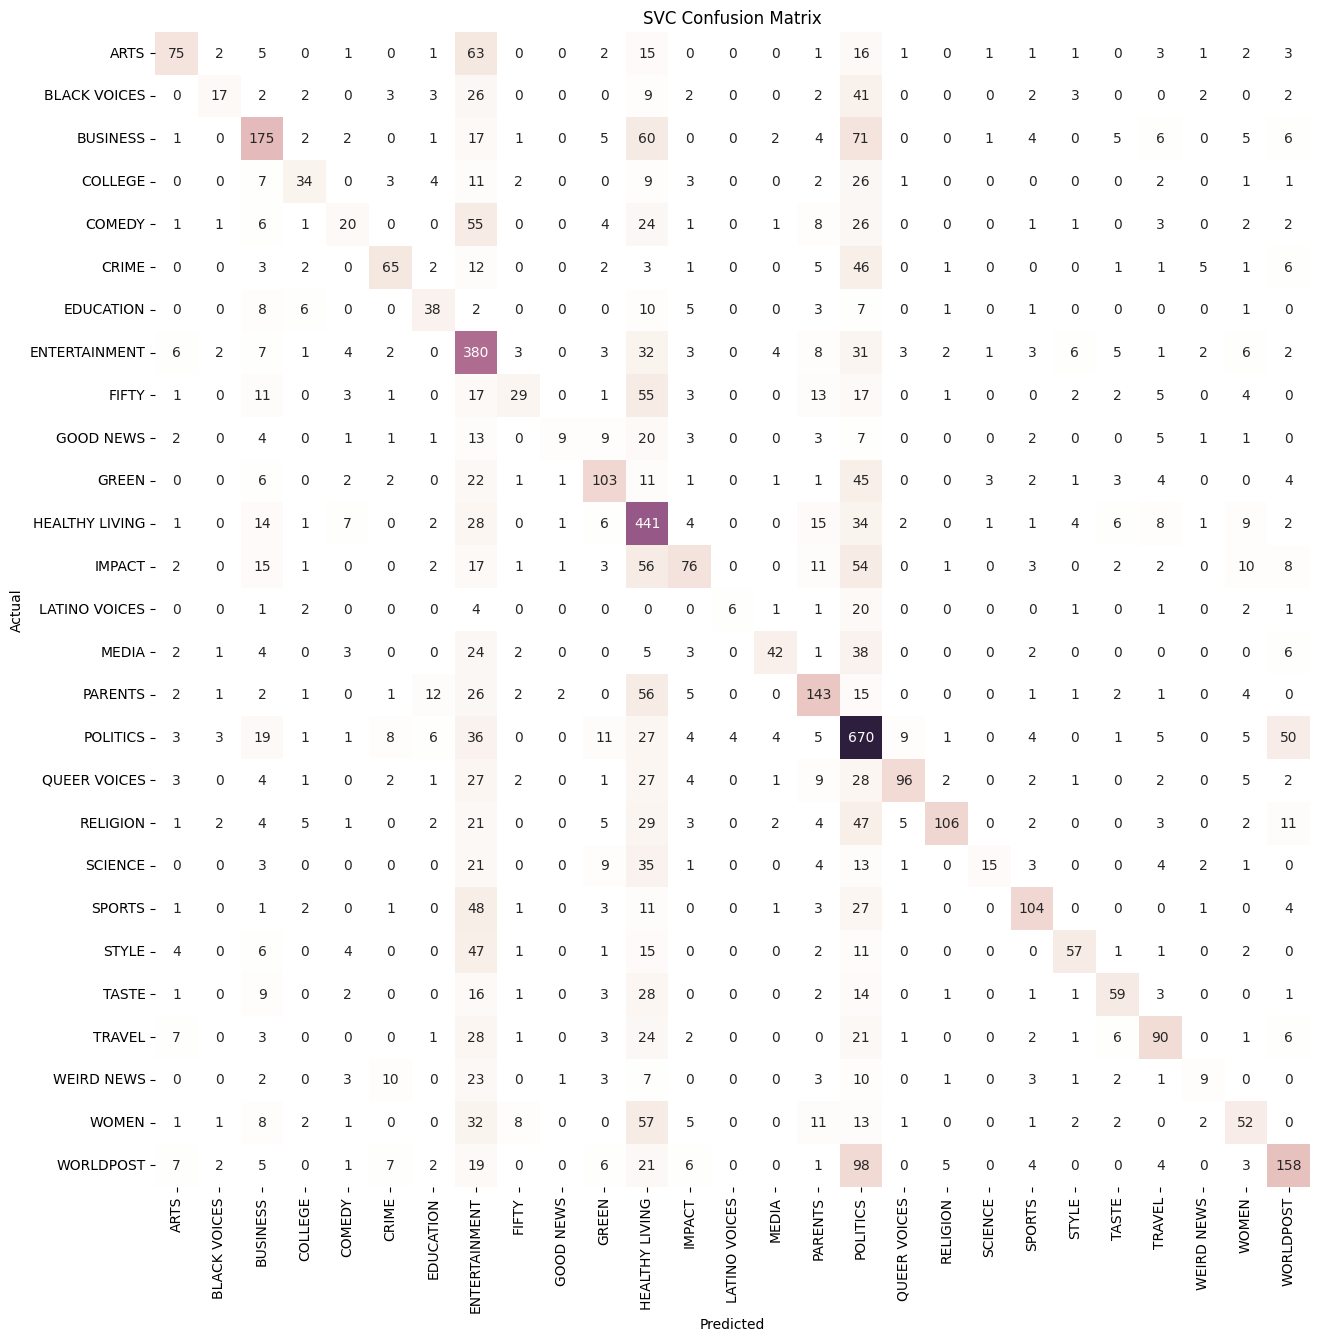

In [ ]:
## Confusion Matrix Diagram
## Reference: https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04

# Plot the confusion Matrix for better view of the results
CM_SVC = confusion_matrix(y_test, SVC_prediction)
CM_SVC = pd.DataFrame(CM_SVC, columns=np.unique(y_test), index = np.unique(y_test))
CM_SVC.index.name = 'Actual'
CM_SVC.columns.name = 'Predicted'

# Plotting with custom figure size
fig, ax = plt.subplots(figsize=(15, 15))  # Create figure and axes for the plot
ax.set_title('SVC Confusion Matrx')           # Set the title for the axes

# Generate a Cubehelix colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(CM_LDA, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})

# Display the plot
plt.show()

### SVC Report

In [ ]:
print(classification_report(y_test, SVC_prediction))

                precision    recall  f1-score   support

          ARTS       0.62      0.39      0.48       194
  BLACK VOICES       0.53      0.15      0.23       116
      BUSINESS       0.52      0.48      0.50       368
       COLLEGE       0.53      0.32      0.40       106
        COMEDY       0.36      0.13      0.19       157
         CRIME       0.61      0.42      0.50       156
     EDUCATION       0.49      0.46      0.48        82
 ENTERTAINMENT       0.37      0.74      0.49       517
         FIFTY       0.53      0.18      0.26       165
     GOOD NEWS       0.60      0.11      0.19        82
         GREEN       0.56      0.48      0.52       213
HEALTHY LIVING       0.41      0.75      0.53       588
        IMPACT       0.56      0.29      0.38       265
 LATINO VOICES       0.60      0.15      0.24        40
         MEDIA       0.71      0.32      0.44       133
       PARENTS       0.54      0.52      0.53       277
      POLITICS       0.46      0.76      0.58  

# Alternative Models (not chosen as the three final models)

## Naive Bayse Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred = nb.predict(X_test)
nb_prob = nb.predict_proba(X_test)

In [ ]:
# get label numbers with descending probabilities
nb_prob_list = np.argsort(nb_prob)[:, -3:][:, ::-1]

# Create an empty np.ndarray
nb_pred_lab = np.empty([3,])

for x in nb_prob_list:
  j=[]
  for i in range(3):
    # add the top three topics to the list
    j += [nb.classes_[x[i]].tolist()]

  # update the ndarray with the topics
  nb_pred_lab = np.concatenate([nb_pred_lab, np.array(j)])
nb_pred_lab = nb_pred_lab[3:].tolist()


# Change the list of elements into a list of lists with 3 elements each
nb_subLab = [nb_pred_lab[n:n+3] for n in range(0, len(nb_pred_lab), 3)]

# array for labels
nb_array = np.array(nb_subLab)

# array for probabilities
nb_prob_p = np.sort(nb_prob)[:, -3:][:, ::-1]

In [ ]:
nb_array = np.array(nb_subLab)
nb_prob_p = np.sort(nb_prob)[:, -3:][:, ::-1]

# Print the results as
# observation_number [labels] : [probabilities]
for i in range(5):    # use len(nb_prob_p) to print all of them
  print(i, nb_array[i] ,":",nb_prob_p[i])

0 ['BUSINESS' 'WORLDPOST' 'IMPACT'] : [1. 0. 0.]
1 ['CRIME' 'WORLDPOST' 'IMPACT'] : [1. 0. 0.]
2 ['POLITICS' 'WORLDPOST' 'IMPACT'] : [1. 0. 0.]
3 ['FIFTY' 'ARTS' 'IMPACT'] : [1.00000000e+000 1.23398131e-216 0.00000000e+000]
4 ['HEALTHY LIVING' 'WORLDPOST' 'IMPACT'] : [1. 0. 0.]


In [ ]:
# Create a df storing actual and predicted labels
df_pred = pd.DataFrame({"NB Predict":nb_pred, "MNB Predict":mnb_pred})
df_results = pd.merge(df_clean[["category"]],df_pred, left_index=True, right_index=True)
df_results.head()

,category,NB Predict,MNB Predict
0,MEDIA,BUSINESS,TASTE
1,RELIGION,CRIME,POLITICS
2,GOOD NEWS,POLITICS,GREEN
3,ARTS,FIFTY,HEALTHY LIVING
4,COMEDY,HEALTHY LIVING,HEALTHY LIVING


### Summary

In [ ]:
# Compute confusion matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix

nb_ocm = confusion_matrix(y_test, nb_pred)
nb_ac = accuracy_score(y_test, nb_pred)

print("Model used: ", nb)
print()
print("Accuracy is: ")
print(nb_ac)
print()
print("Number of features: ")
print(max_features_num)
print()
print("Ngram used: ")
print(ngram_range)

Model used:  GaussianNB()

Accuracy is: 
0.1984

Number of features: 
3000

Ngram used: 
(1, 1)


### Accuracy Score

In [ ]:
print(accuracy_score(nb_pred, y_test))

0.1984


### Confusion Matrix

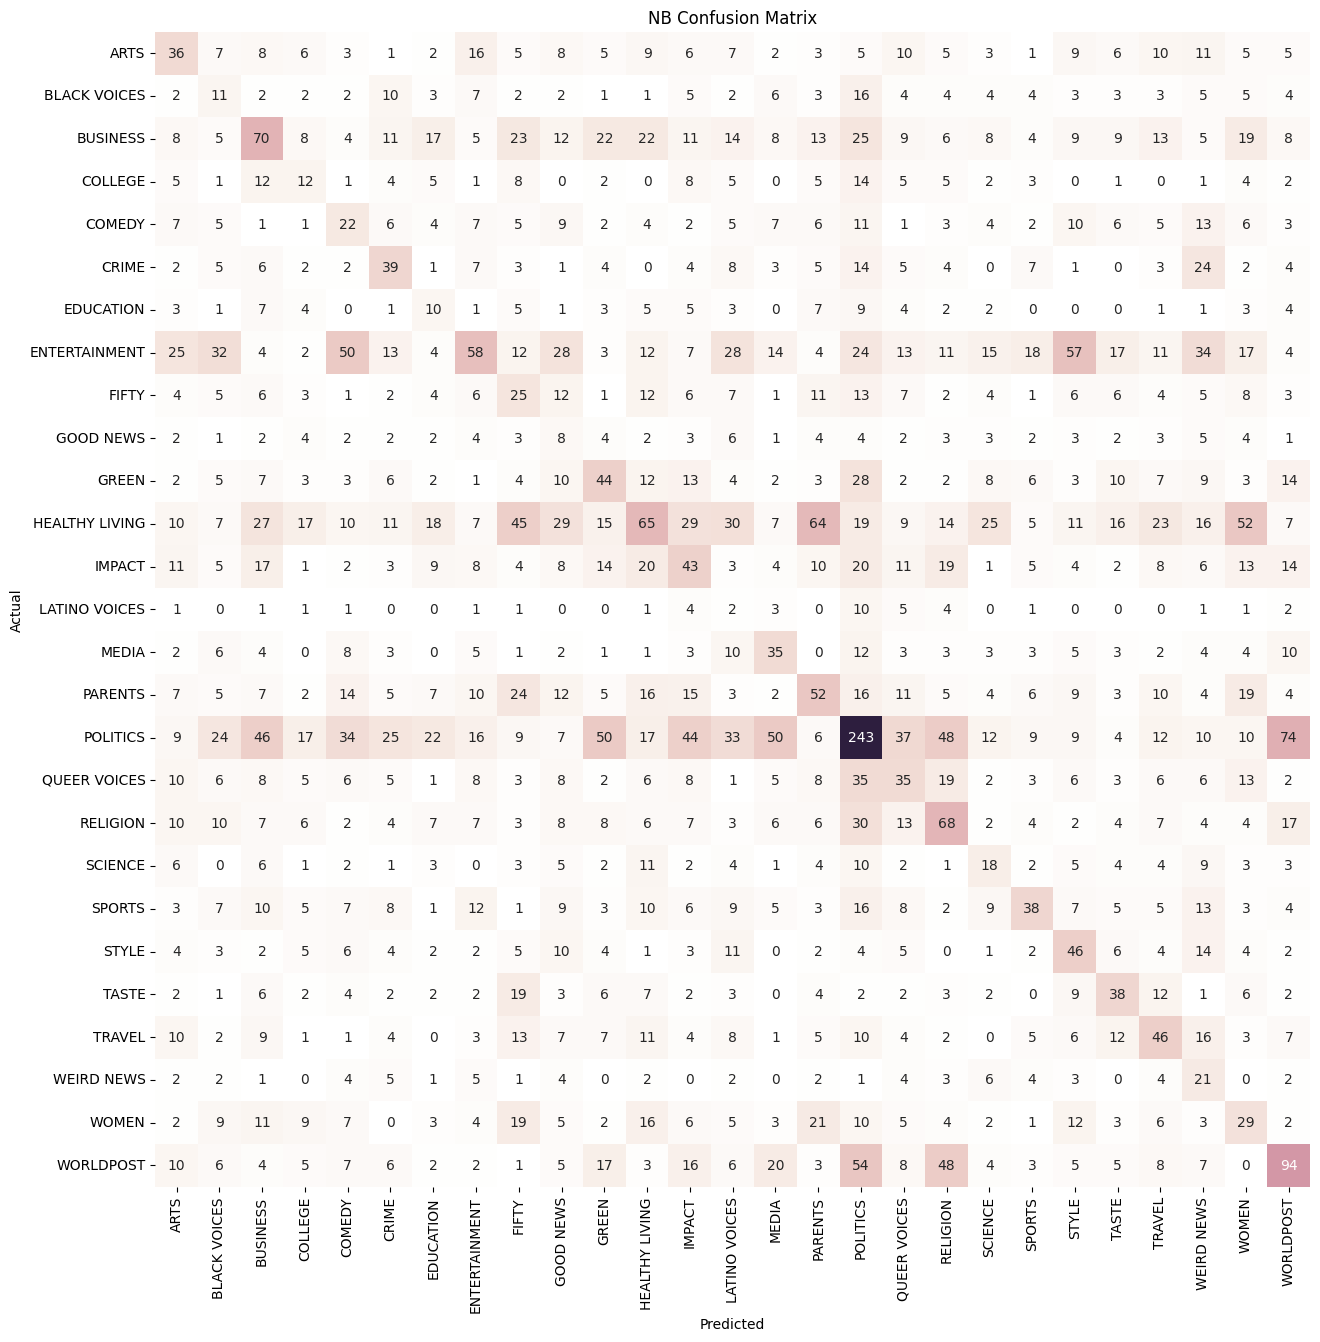

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Confusion Matrix Diagram
## Reference: https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04

nb_data = confusion_matrix(y_test, nb_pred)
df_nb_cm = pd.DataFrame(nb_data, columns=np.unique(y_test), index = np.unique(y_test))
df_nb_cm.index.name = 'Actual'
df_nb_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_nb_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})
plt.title('NB Confusion Matrix')
plt.show()

### Countplot

[Text(0.5, 1.0, 'NB Predictions')]

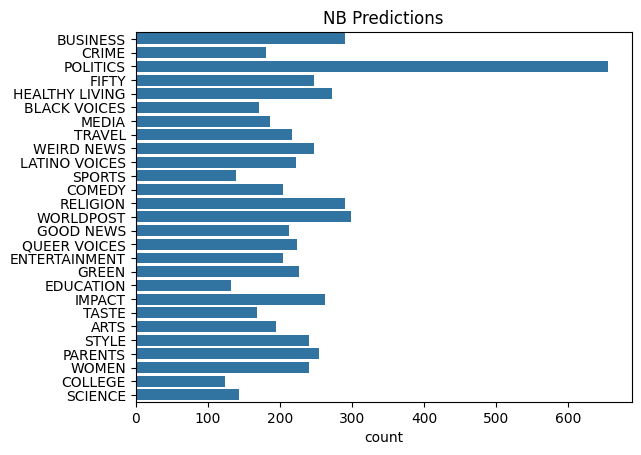

In [ ]:
import seaborn as sns
# Distribution of NB predictions
sns.countplot(nb_pred).set(title='NB Predictions')

### **NB Report**

In [ ]:
# get prediction report
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred))
print("NB Classification Report")
print()
print("Number of features: ")
print(max_features_num)
print()
print("Ngram used: ")
print(ngram_range)

                precision    recall  f1-score   support

          ARTS       0.18      0.19      0.19       194
  BLACK VOICES       0.06      0.09      0.08       116
      BUSINESS       0.24      0.19      0.21       368
       COLLEGE       0.10      0.11      0.10       106
        COMEDY       0.11      0.14      0.12       157
         CRIME       0.22      0.25      0.23       156
     EDUCATION       0.08      0.12      0.09        82
 ENTERTAINMENT       0.28      0.11      0.16       517
         FIFTY       0.10      0.15      0.12       165
     GOOD NEWS       0.04      0.10      0.05        82
         GREEN       0.19      0.21      0.20       213
HEALTHY LIVING       0.24      0.11      0.15       588
        IMPACT       0.16      0.16      0.16       265
 LATINO VOICES       0.01      0.05      0.02        40
         MEDIA       0.19      0.26      0.22       133
       PARENTS       0.20      0.19      0.20       277
      POLITICS       0.37      0.28      0.32  

In [ ]:
# Distribution of NB predictions
nb_counts = np.unique(nb_pred, return_counts=True)
nb_counts

(array(['ARTS', 'BLACK VOICES', 'BUSINESS', 'COLLEGE', 'COMEDY', 'CRIME',
        'EDUCATION', 'ENTERTAINMENT', 'FIFTY', 'GOOD NEWS', 'GREEN',
        'HEALTHY LIVING', 'IMPACT', 'LATINO VOICES', 'MEDIA', 'PARENTS',
        'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
        'STYLE', 'TASTE', 'TRAVEL', 'WEIRD NEWS', 'WOMEN', 'WORLDPOST'],
       dtype='<U14'),
 array([195, 171, 291, 124, 205, 181, 132, 205, 247, 213, 227, 272, 262,
        222, 186, 254, 655, 224, 290, 144, 139, 240, 168, 217, 248, 240,
        298]))

## Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
mnb_pred = mnb.predict(X_test)
mnb_prob = mnb.predict_proba(X_test)
mnb_prob

array([[0.0296157 , 0.01100704, 0.0376582 , ..., 0.01870552, 0.04737738,
        0.01719861],
       [0.01419303, 0.00933791, 0.04710447, ..., 0.00579423, 0.01527207,
        0.12049494],
       [0.00975333, 0.00491368, 0.04905665, ..., 0.00330477, 0.02235813,
        0.03579357],
       ...,
       [0.01546976, 0.00800164, 0.07248019, ..., 0.00720911, 0.03362676,
        0.02715018],
       [0.00908485, 0.00710934, 0.18085474, ..., 0.00217872, 0.02983556,
        0.04139352],
       [0.03401204, 0.0373539 , 0.10621813, ..., 0.01204485, 0.05182118,
        0.06137316]])

In [ ]:
# get label numbers with descending probabilities
mnb_prob_list = np.argsort(mnb_prob)[:, -3:][:, ::-1]

# Create an empty np.ndarray
mnb_pred_lab = np.empty([3,])

for x in mnb_prob_list:
  j=[]
  for i in range(3):
    # add the top three topics to the list
    j += [mnb.classes_[x[i]].tolist()]

  # update the ndarray with the topics
  mnb_pred_lab = np.concatenate([mnb_pred_lab, np.array(j)])
mnb_pred_lab = mnb_pred_lab[3:].tolist()

# Change the list of elements into a list of lists with 3 elements each
mnb_subLab = [mnb_pred_lab[n:n+3] for n in range(0, len(mnb_pred_lab), 3)]

# array for labels
mnb_array = np.array(mnb_subLab)

# array for probabilities
mnb_prob_p = np.sort(mnb_prob)[:, -3:][:, ::-1]

In [ ]:
mnb_array = np.array(mnb_subLab)
mnb_prob_p = np.sort(mnb_prob)[:, -3:][:, ::-1]

# Print the results as [labels] : [probabilities]
for i in range(5):  # use len(nb_prob_p) to print all of them
  print(i, mnb_array[i] ,":",mnb_prob_p[i])

0 ['TASTE' 'HEALTHY LIVING' 'TRAVEL'] : [0.22583587 0.12071833 0.06039672]
1 ['POLITICS' 'WORLDPOST' 'BUSINESS'] : [0.40714862 0.12049494 0.04710447]
2 ['GREEN' 'POLITICS' 'IMPACT'] : [0.28924819 0.28861218 0.07924557]
3 ['HEALTHY LIVING' 'POLITICS' 'ENTERTAINMENT'] : [0.12411506 0.1068681  0.08820789]
4 ['HEALTHY LIVING' 'IMPACT' 'PARENTS'] : [0.35086459 0.07469848 0.07467976]


### Summary

In [ ]:
# Compute confusion matrix
mnb_ocm = confusion_matrix(y_test, mnb_pred)
mnb_ac = accuracy_score(y_test, mnb_pred)

print("Model used: ", mnb)
print()
print("Accuracy is: ")
print(mnb_ac)
print()
print("Number of features: ")
print(max_features_num)
print()
print("Ngram used: ")
print(ngram_range)

Model used:  MultinomialNB()

Accuracy is: 
0.42448

Number of features: 
3000

Ngram used: 
(1, 1)


### Accuracy Score

In [ ]:
print(accuracy_score(mnb_pred, y_test))

0.42448


### Countplot

[Text(0.5, 1.0, 'MNB Predictions')]

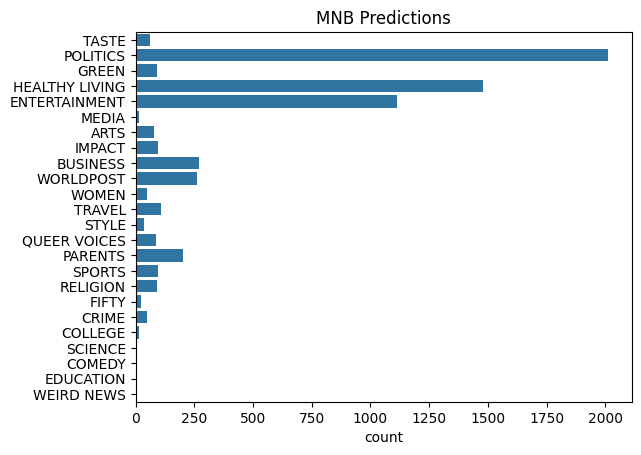

In [ ]:
# Distribution of MNB predictions
sns.countplot(mnb_pred).set(title='MNB Predictions')

### Confusion Matrix

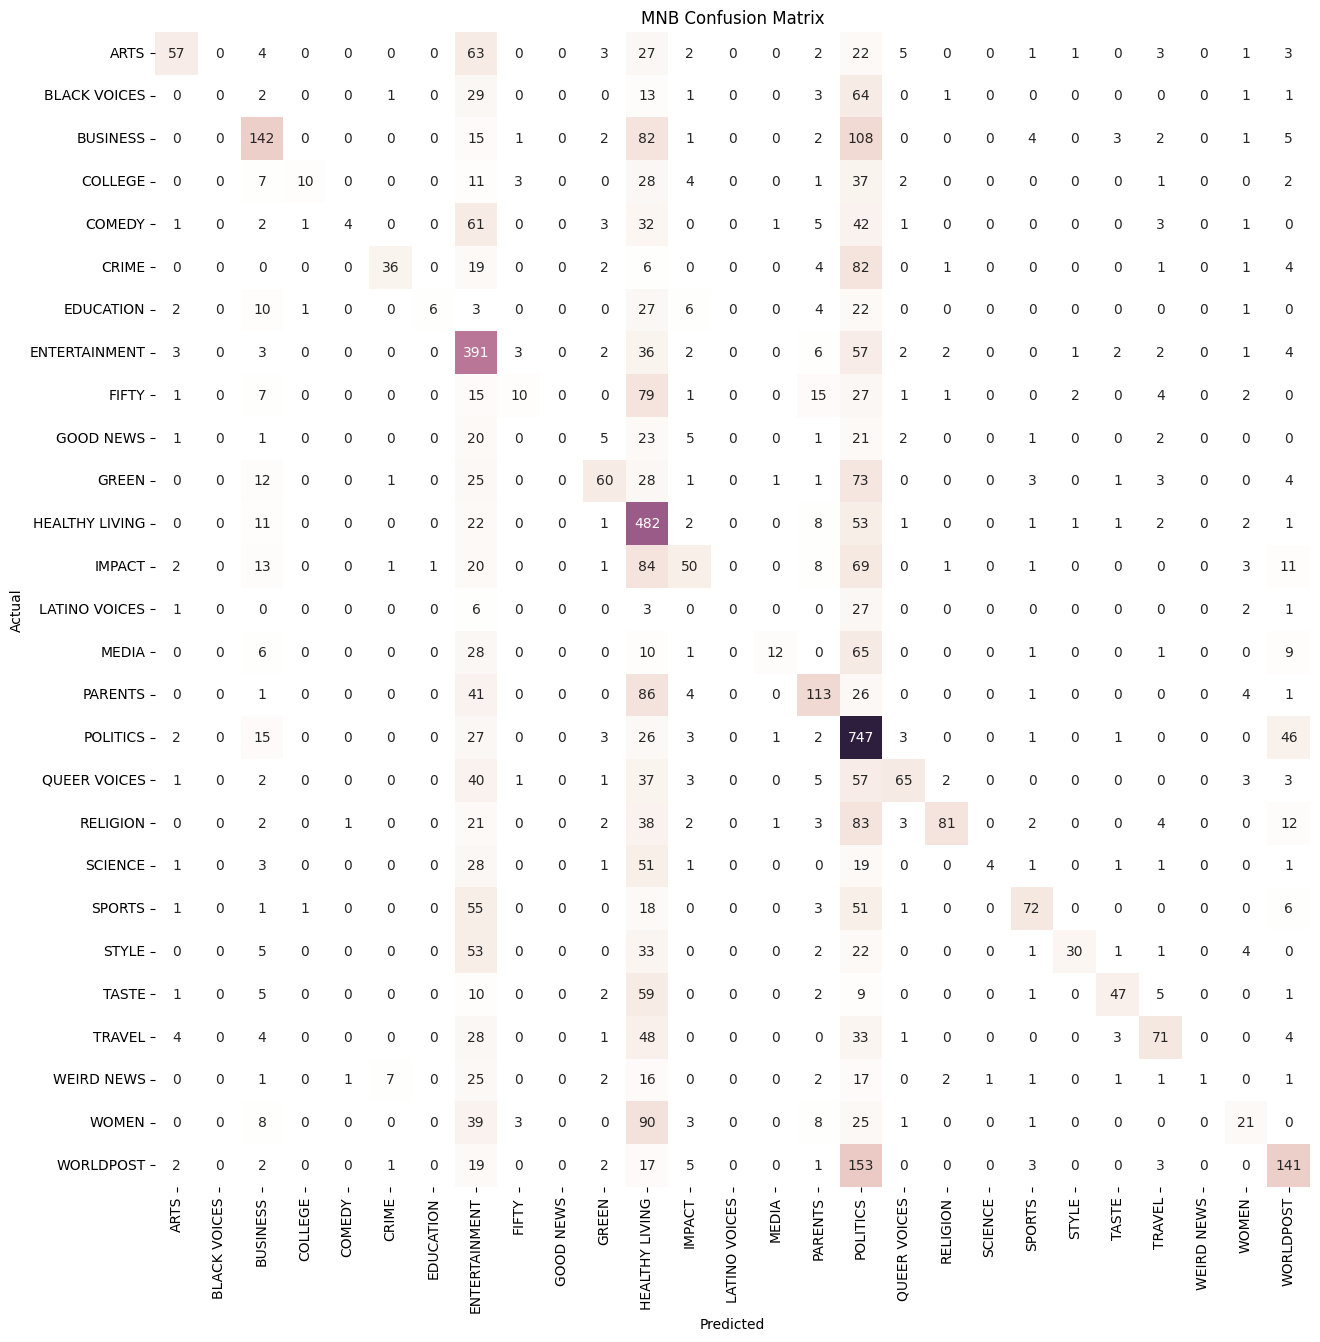

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Confusion Matrix Diagram
## Reference: https://gist.github.com/vikramsoni2/3293b5dab320ba6d67eb8eed415e1c04

mnb_data = confusion_matrix(y_test, mnb_pred)
df_mnb_cm = pd.DataFrame(mnb_data, columns=np.unique(y_test), index = np.unique(y_test))
df_mnb_cm.index.name = 'Actual'
df_mnb_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_mnb_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})
plt.title('MNB Confusion Matrix')
plt.show()

### **MNB Report**

In [ ]:
print(classification_report(y_test, mnb_pred))
print("MNB Classification Report")
print()
print("Number of features: ")
print(max_features_num)
print()
print("Ngram used: ")
print(ngram_range)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.71      0.29      0.42       194
  BLACK VOICES       0.00      0.00      0.00       116
      BUSINESS       0.53      0.39      0.45       368
       COLLEGE       0.77      0.09      0.17       106
        COMEDY       0.67      0.03      0.05       157
         CRIME       0.77      0.23      0.35       156
     EDUCATION       0.86      0.07      0.13        82
 ENTERTAINMENT       0.35      0.76      0.48       517
         FIFTY       0.48      0.06      0.11       165
     GOOD NEWS       0.00      0.00      0.00        82
         GREEN       0.65      0.28      0.39       213
HEALTHY LIVING       0.33      0.82      0.47       588
        IMPACT       0.52      0.19      0.28       265
 LATINO VOICES       0.00      0.00      0.00        40
         MEDIA       0.75      0.09      0.16       133
       PARENTS       0.56      0.41      0.47       277
      POLITICS       0.37      0.85      0.52  

In [ ]:
# Distribution of MNB predictions
mnb_counts = np.unique(mnb_pred, return_counts=True)
mnb_counts

(array(['ARTS', 'BUSINESS', 'COLLEGE', 'COMEDY', 'CRIME', 'EDUCATION',
        'ENTERTAINMENT', 'FIFTY', 'GREEN', 'HEALTHY LIVING', 'IMPACT',
        'MEDIA', 'PARENTS', 'POLITICS', 'QUEER VOICES', 'RELIGION',
        'SCIENCE', 'SPORTS', 'STYLE', 'TASTE', 'TRAVEL', 'WEIRD NEWS',
        'WOMEN', 'WORLDPOST'], dtype='<U14'),
 array([  80,  269,   13,    6,   47,    7, 1114,   21,   93, 1479,   97,
          16,  201, 2011,   88,   91,    5,   96,   35,   61,  110,    1,
          48,  261]))